<font size="+4">Lesson 5: Happiness and Pinecones</font>
    
In this lesson we'll compare top-down to bottom-up approaches to solving problems and show when and why a recursive, top-down approach might perform better.
    
To demonstrate this, we will use an example of the longest common subsequence problem, which I have called 'Happiness & Pinecones'.

Along the way you'll:
1. Practice the 4 steps you learned previously
2. Learn when to use the multi-prefix pattern of subproblems
    
    
The following video introduces the topic.  


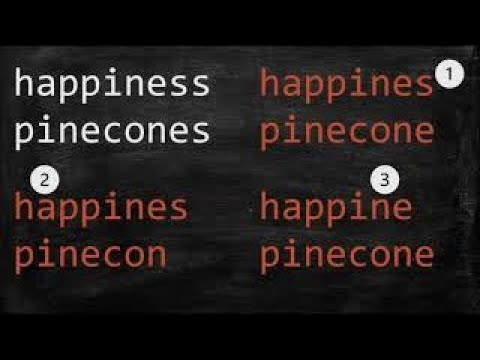

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('dLhsiN6WMjY')

# Longest Common Subsequence
The version of the [longest common subsequence](https://en.wikipedia.org/wiki/Longest_common_subsequence_problem) problem that we will work in this lesson is where you look for a common subsequence between only _two_ words. A subsequence of a word are letters that are not necessarily contiguous. And of course, the string can be made from any finite alphabet. We're using letters to simplify the example.

<figure>
    <img src="../images/h_and_p_on_dna.png" width = 400>
    <figcaption>Figure 1: You're given two strings. Find the length of the longest matching subsequences you can find in both words.
    </figcaption>
</figure>
<p>

To be sure you understand what common subsequences are, take the following quiz:

In [2]:
%run quizzes/quiz.py quizzes/05/lcsubsequence_example.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>Fill in…

As a reminder of the four steps to solving a dynamic programming problem, see the following checklist:

__Step 1__ - look at all possible combinations
* [ ] Find and temporarily ignore the optimization word
* [ ] Choose a subproblem pattern
* [ ] Find the constraint(s)
* [ ] Use the given constraint to divide all the possible valid subproblems into cases

__Step 2__ - write a recursive algorithm
* [ ] Stop ignoring the optimization - do that optimization over the cases you found. Write the recurrence relation down.
* [ ] Implement a recursive algorithm directly from the recurrence relation, paying attention to base cases, indices etc.

__Step 3__ - memoize
* [ ] Memoize the algorithm

__Step 4__ - iterate (bottom-up)
* [ ] Convert to an iterative algorithm (optional)

## Find the Subproblems (step 1)
Step 1 are your opening moves: - identify the optimization word, ignore it for now, identify the constraints if any, identify your subproblem pattern.

In [3]:
%run quizzes/quiz.py quizzes/05/lcsubsequence_first_step.json

VBox(box_style='info', children=(HBox(children=(HTML(value="<style>p{word-wrap: break-word}</style> <p>What ar…

Your ultimate goal is to break the solution up into subproblems. But not just any subproblems .. they need to have 'optimal substructure' - which means they need to be sized and ordered in such a way that once you solve them, you have solved the whole problem.

To this end, it sometimes helps to think about your base case or the trivial case - and how you _reach_ it, because then you can build up the subproblems in size. The algorithm will eat the subproblems in the opposite order - for example, in the case of words, starting with the whole word and reaching the empty string. But to develop the algorithm, it is helpful to build up from the smallest possible subproblem.


In [4]:
%run quizzes/quiz.py quizzes/05/lcsubsequence_order_subproblems.json

VBox(box_style='info', children=(HBox(children=(HTML(value="<style>p{word-wrap: break-word}</style> <p>Order t…

In previous problems we looked at a prefix of the given input. In this problem we will do something similar, but our input is two strings, so we'll look at _two_ prefixes.

If your input is: $x_1$, $x_2$, $x_3$, ... ,$x_n$, and $y_1$, $y_2$, $y_3$, ... ,$y_m$, your subproblems will be of the form: $x_1$, $x_2$, $x_3$, ..., $x_i$ and $y_1$, $y_2$, $y_3$, ... , $y_j$. For example:

    +---------------------------------+
    | x1   x2   x3  x4   x5   x6   x7 |  x8   x9   x10
    +---------------------------------+
    
    +------------------+
    | y1   y2   y3  x4 | x5   x6    x7   x8   x9   x10
    +------------------+

Now that we have the general form of the subproblems, we need to divide them into types. Aside from the base case, we will have three types of subproblems which depend on whether the last letters of the strings match or not.

Here is where the constraint comes in - our constraint is that letters need to match, and also their relative order cannot change between the solution subsequence and the input subsequences.

1. __The last letters match:__ This means we found a letter that will belong to the solution. So that we keep the order of the elements, (that's the definition of keeping it a subsequence) we only need to look at a prefix of the words up to the matching letter. 
2. __The last letters do not match:__ This means that the last letter of each word might have a chance to be in the prefix of the other word.

## Write the Recursive Algorithm (step 2)
We have established that our subproblem pattern is multi-prefix. From the discussion above the recursion relation is:

$\text{X and Y are words, lcs is short for 'length of longest common subsequence' }$

\begin{equation}
  lcs(x_i, y_j, count) = 
  \begin{cases}
    0, & \text{if}\ i=0 \text{ or } j = 0 \\
    1 + lcs(x_{i-1}, y_{j-1}), & \text{if}\ i, j \neq 0 \text{ and } x_i = y_j \\
    max 
    \begin{cases}
     lcs(x_i, y_{j-1})  & \text{if}\ i,j\neq0 \text{ and } x_i \neq y_j  \\
     lcs(x_{i-1}, y_{j})  \\
    \end{cases}\\
  \end{cases}\\
\end{equation}

$\text{where } x_i \text{ are the first i letters of X}, \text{and } y_j \text{ are the first j letters of Y}$

Check your understanding of the recursion with this quiz:

In [5]:
%run quizzes/quiz.py quizzes/05/lcsubsequence_subproblems.json

VBox(box_style='info', children=(HBox(children=(HTML(value="<style>p{word-wrap: break-word}</style> <p>Suppose…

The recursion relation leads right into the implementation.

<div class="exercise exercise-info">
Implement the naive recursive algorithm to calculate the length of the longest common subsequence when given two strings X and Y. It will run in exponential time, that's expected for this step. Starter code provided below. Note that the function <code>solve(X, Y)</code> takes zero based strings as input which is different from the recurrence formula which is 1-based.
</div>

In [6]:
def solve(X, Y):

    # YOUR CODE HERE
    return 0

#unit tests
#assert(solve('a', '') == 0)
#assert(solve('happiness', 'pinecones') == 5)

## Write the Memoized Algorithm (step 3)
In order to make the workings of the memoized algorithm clear it's important to see how the memoized algorithm fills up its memo (or cache). We can think of the cache as a 2 dimensional grid. The following implementation uses the strings themselves to form the index. Uncomment the print statement and play around with different inputs (I suggest keeping them small).

In [7]:
def memoize(original_function):
        memo = {}

        def wrapper(X,Y):
            key = tuple([X,Y])
            if key not in memo:
                memo[key] = original_function(X,Y)
                
                #uncomment the following lines to see how many times the grid gets filled                
                #memoize.counter+=1 
                #print (memoize.counter, memo)
                
            return memo[key]

        return wrapper
  
@memoize
def solve(X, Y):

     # YOUR CODE HERE
     return 0

#unit tests
memoize.counter = 0 # function attribute to count filled cells
#solve('abc', 'abc')
solve('', 'abc')

0

When you were trying out different inputs on the memoized version of longest common subsequence, did you notice that the number of times memoize is called, varies wildly with different types of input?

In [8]:
%run quizzes/quiz.py quizzes/05/lcsubsequence_memoize_quiz.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>Refer t…

As we saw above, the memoized version does not always need to fill up the whole grid to get the final result. An extreme example is when the words are identical. In this case the algorithm zooms diagonally down the grid and runs in linear time!

## Write the Iterative Algorithm (step 4)
In the following exercise, convert the longest common subsequence to an iterative, bottom up implementation.

<div class="exercise exercise-info">
Convert the longest common subsequence to an iterative, bottom up implementation. You can use O(m*n) storage, but challenge yourself to using only 2 rows of storage to achieve O(n) in space. <u>Spoiler alert: huge hints in starter code below!</u>
</div>

In [9]:
def solve(X, Y):
    
    # will hold only two rows
    memo = {}
    m, n = len(X), len(Y)

    for i in range(m + 1):       
        for j in range(n + 1):
            
            # Hint: run along all the columns, but only need 2 rows: row 0 and row 1          
            col = j 
            row = i%2
        
            # Hint: The 'upper' row will alternate:  first row 0 is the upper row, then row 1 becomes the 'upper' row
            
            ######################
            ### YOUR CODE HERE ###
            ######################
            
            #solve.counter += 1
            #print(solve.counter, memo)
    
    return memo[tuple([row,col])]

solve.counter = 0 ### function attribute to count filled cells

#unit tests
#solve('abcd', 'abcd')

<div class="exercise exercise-info">
    <b>Thought exercise:</b> <br><br>
    Try different inputs with the bottom-up solution. You'll notice that even in the case of the two strings matching exactly, the iterative solution always fills the whole grid, so working in O(m*n) time, whereas the recursive, memoized solution breezes through that input in O(n) time.<br><br>
    1. Sometimes the recursive, memoized solution outperforms the iterative one also in terms of how many calculations it makes. Why is this?
<br><br>
    2. It wasn't too difficult to write an implementation of the iterative solution to use only O(n) storage instead of using a whole grid which would be O(m*n) storage. Can you easily convert the memoized recursive algorithm to only use linear storage too?
</div>

# Longest Common Substring
The [longest common substring](https://en.wikipedia.org/wiki/Longest_common_substring_problem) problem is most often stated like this: You are given two string, X of length n and Y of length m. Find the longest string which is a substring of both X and Y.

Note, like we did in the longest common subsequence, the exercise here is to find the _length_ of the longest substring and not the substring itself.

This in itself is __a handy trick__ for solving dynamic programming problems. If you are asked to find the longest/shortest X, it is often easier to first design an algorithm to return the length of the longest/shortest X. You first solve the problem of existence and then very often, returning an instance is only a matter of drudge work.

In [10]:
%run quizzes/quiz.py quizzes/05/lcstring_example.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>Fill in…

## Find the Subproblems (step 1)
Remember that by the end of this step you will have examined all the valid subproblem solutions according to constraints or instructions in the given problem statement.

### Ignore Optimization
__Start this way:__  Read the problem and pick out the optimization request if any - and ignore it! Answer the following quiz about the problem described here.

In [11]:
%run quizzes/quiz.py quizzes/05/lcsubstring_first_step.json

VBox(box_style='info', children=(HBox(children=(HTML(value="<style>p{word-wrap: break-word}</style> <p>Which s…

### Divide Subproblems into Cases
Remember that there are 3 main ways to derive the recurrence relation:

1. __It's given to you!__ That's not the case here
2. __Build it from a given constraint.__ This is our case: the strings must must match. If they don't match, we don't count them.
3. __Add your own constraint, then build from that.__ n/a

The constraint of 'substrings must match in order to count them' doesn't lead as smoothly into the recurrence relation as in the drinking game/largest independent set in a tree problem. But it still hints how to start: Start by __comparing the last letter__ of each word.

Do they match? If they do, then we're interested in looking at the rest of both strings. If they don't match, then we need to split the next step into two: look at the whole of the 1st string and one letter less of the 2nd string. Then look at the whole of the 2nd string and one letter less of the 1st string.

The important thing to note is that what I wrote above is NOT the final algorithm - it's just a way to think about how to build a recurrence relation that knows how to _count_ substring lengths and covers all the possible substrings.

In [12]:
%run quizzes/quiz.py quizzes/05/lcs_rr.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>Select …

Going back to our example of 'happiness and pinecones', you have the following three cases (first call of the function)

1. Compare last letters ('s' and 's') and add result to comparison of 'happines' and 'pinecone'
2. Compare 'happiness' and 'pinecone'
3. Compare 'happines' and 'pinecones'

## Write the Recursive Algorithm (step 2)
Once you write the recurrence relation, you're basically done, so let's dive in.

### Add Optimization Back In
The problem asked to find the _longest_ substring. So the recurrence relation will include _maximizing_ over the three cases you found above.

### Write the Recurrence Relation
The practice problem is a bit more challenging than the worked example above. I admit that I found it easier to first write the algorithm in Python, but writing up the recurrence was a good exercise in LaTeX 😜

<div class="exercise exercise-info">
Writing the recurrence relation is the crux to solving the problem. Try to work it out yourself.
</div>

$x_i \text{ are the first i letters of X}$

$y_j \text{ are the first j letters of Y}$


\begin{equation}
  lcs(x_m, y_n, count) = 
  \begin{cases}
    count,  & \text{if}\ i=0 \text{ or } j = 0 \\
    max
    \begin{cases} & & & & & & \text{otherwise} \\
      c
      \begin{cases}  \\
        lcs(x_{i-1}, y_{j-1}, count + 1),  & & & \text{if}\  x_i = y_j \\
        count, &  & & \text{otherwise}  \\
      \end{cases} \\
     lcs(x_i, y_{j-1}, 0)  \\
     lcs(x_{i-1}, y_{j}, 0)  \\
    \end{cases}
  \end{cases}
\end{equation}


### Implement the Recursive Algorithm
Keep the recurrence relation in front of you as a guide for the following exercise.

<div class="exercise exercise-info">
Implement the naive recursive algorithm to calculate the length of the longest common substring when given two strings X and Y. It will run in exponential time, that's expected for this step. Starter code provided below. Note that the function <code>lcs_count(X, Y)</code> takes zero based strings as input which is different from the recurrence formula which is 1-based.
</div>

In [13]:
def lcs(X, Y, count):
    ### YOUR CODE ###
    return 0

def lcs_count(X,Y):
    return lcs(X, Y, 0)

# unit tests
# YOUR CASES HERE ###

#assert(lcs_count('happiness', 'pinecones') == 4)

## Write the Memoized Algorithm (step 3)
At this point you have a correct but inefficient algorithm. The naive recursive algorithm runs in exponential time. Remember that all memoization does is store the solutions of the subproblems so that they don't need to be calculated more than once.

<div class="exercise exercise-info">
Now implement the recursive, <b>memoized</b> algorithm to solve Happiness & Pinecones (longest common substring) problem. Starter code provided below. A clever solution from Schmatz, (2017) uses a decorator to memoize and caches results using the calling function's arguments as index into the cache (see solutions).
    
While you're working on this, note how a table of values is built
</div>

In [14]:
#The solution is similar to (Schmatz, 2017). See references section
def memoize(original_function):
    memo = {}
    
    def wrapper(X, Y, count):
       ## YOUR CODE
        
        return wrapper

@memoize
def lcs(X, Y, count = 0):

    ## YOUR CODE
    return 0

def lcs_count(X,Y):
    return lcs(X, Y, 0)

#unit tests
#assert(lcs('', '') == 0)
#assert(lcs('cat', 'sa') == 1)

# Solutions

<div class="exercise exercise-warning"><details><summary>Longest common subsequence - naive - recursive</summary> 
    
```python 
    
    #%load solutions/05/lcsubsequence_naive.py
    def solve(X, Y):

    m, n = len(X), len(Y)
    if m == 0 or n == 0:
        return 0 

    if X[m - 1] == Y[n - 1]:
        return 1 + solve(X[0: m - 1], Y[0: n - 1])

    return max(solve(X[0:m], Y[0:n - 1]), solve(X[0:m - 1], Y[0:n]))

    #unit tests
    assert(solve('a', '') == 0)
    assert(solve('happiness', 'pinecones') == 5) 
```
    
</details>

<div class="exercise exercise-warning"><details><summary>Longest common subsequence - memoized - recursive</summary> 
    
```python 
    
    #%load solutions/05/lcsubsequence_memoized.py
    def memoize(original_function):
            memo = {}

            def wrapper(X,Y):
                key = tuple([X,Y])
                if key not in memo:
                    memo[key] = original_function(X,Y)

                    #uncomment the following lines to see how many times the grid gets filled 
                    #memoize.counter+=1 
                    #print (memoize.counter, memo)

                return memo[key]

            return wrapper
  
    memoize.counter = 0 ### function attribute to count filled cells

    @memoize
    def solve(X, Y):

        m, n = len(X), len(Y)
        if m == 0 or n == 0:
            return 0 

        if X[m - 1] == Y[n - 1]:
            return 1 + solve(X[0: m - 1], Y[0: n - 1])

        return max(solve(X[0:m], Y[0:n - 1]), solve(X[0:m - 1], Y[0:n]))


    #unit tests
    #solve('abc', 'abc')
```
    
</details>

<div class="exercise exercise-warning"><details><summary>Longest common subsequence - iterative - bottom-up</summary> 
    
```python 
    
    #%load solutions/05/lcsubsequence_iterated.py
    def solve(X, Y):
    
    # will hold only two rows
    memo = {}
    m, n = len(X), len(Y)

    for i in range(m + 1):       
        for j in range(n + 1):
            
            # run along all the columns, but only need 2 rows: row 0 and row 1          
            col = j 
            row = i%2
        
            # The 'upper' row will alternate:  first row 0 is the upper row, then row 1 becomes the 'upper' row
            if row == 0:
                upper = row + 1
            else:
                upper = row - 1
                
            key = tuple([row, col])    
            if i == 0 or j == 0:
                memo[key] = 0
            elif X[i - 1] == Y[j - 1]:
                memo[key] = 1 + memo[tuple([upper, col - 1])]
            else:
                memo[key] = max(memo[tuple([row, col - 1])], memo[tuple([upper, col])])
            
            #solve.counter += 1
            #print(solve.counter, memo)
    
    return memo[tuple([row,col])]

    solve.counter = 0 ### function attribute to count filled cells

    #unit tests
    #solve('rachel', 'rachel')
    
```
    
</details>

<div class="exercise exercise-warning"><details><summary>Why does recursive memoized longest common subsequence sometimes outperform interative implementation?</summary> 
    
    The recursive implementation works top-down, so it works only on the substrings it needs. If the strings match, the algorithm immediately shortens the strings by 1 letter and doesn't bother checking anything else. The bottom up implementation doesn't know the future - it calculates all the subproblems in case it will need the results later. However, for the very same reason, the recursive algorithm cannot be easily converted to using only linear space since depending on the input, the grid it builds up could be sparse or more filled.
    
</details>

<div class="exercise exercise-warning"><details><summary>Longest common substring - naive - recursive</summary> 
    
```python 
    
    #%load solutions/05/lcsubstring_naive.py
    def solve_counter(X, Y, count = 0):

    m, n = len(X), len(Y)
    if m == 0 or n == 0:
        return count 

    if X[m - 1] == Y[n - 1]:
        count = solve_counter(X[0: m - 1], Y[0: n - 1], count + 1)

    return max(count, solve_counter(X[0:m], Y[0:n-1], 0), solve_counter(X[0:m-1], Y[0:n], 0))

    def solve(X,Y):
        return solve_counter(X, Y, 0)

    #unit tests
    assert(solve('', '') == 0)
    assert(solve('', 'b') == 0)
    assert(solve('a', '') == 0) 
```
    
</details>

<div class="exercise exercise-warning"><details><summary>Longest common substring - memoized</summary> 
    
```python 
    
    # This solution is an improved version of a clever memoize function that uses the strings as keys (useful for learning and debugging) that I found here.:
    # Schmatz, S. (2017, December 7). Intermediate Dynamic Programming. https://stevenschmatz.github.io/blog/2017/12/07/intermediate-dynamic-programming/
    # The original version includes the 'count' input arg in the memo dictionary key, which seemed to me uneccessary so I removed it.
    def memoize(original_function):
        memo = {}

        def wrapper(X, Y, count):
            key = tuple([X,Y])
            if key in memo:
                return memo[key]

            result = original_function(X, Y, counter)
            memo[key] = result

            return result

        return wrapper


    @memoize
    def solve_count(X, Y, count = 0):

        m, n = len(X), len(Y)
        #print ('in solve_count', m, " : ", X, "   ", n, " : ", Y , " -->", count)
        if m == 0 or n == 0:
            return count 

        if X[m - 1] == Y[n - 1]:
            count = solve_count(X[0: m - 1], Y[0: n - 1], count + 1)

        return max(count, solve_count(X[0:m], Y[0:n-1], 0), solve_count(X[0:m-1], Y[0:n], 0))

    def solve_count(X,Y):
        return lcs(X, Y, 0)

    #unit tests
    solve('abc', 'abc', 0)
   
```
    
</details>

# References

1. Dasgupta, S., Papadimitriou, C. H., & Vazirani, U. V. (2008). Algorithms. McGraw-Hill Higher Education New York.

2. Forišek, M. (2015). Towards a better way to teach dynamic programming. Olympiads in Informatics, 9, 45–55.

3. Jauhari, A. (2017, August 20). Print the longest common substring. GeeksforGeeks. https://www.geeksforgeeks.org/print-longest-common-substring/

4. Schmatz, S. (2017, December 7). Intermediate Dynamic Programming. https://stevenschmatz.github.io/blog/2017/12/07/intermediate-dynamic-programming/

In [15]:
#workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())